In [1]:
import pandas as pd

In [2]:
#Ratings data
rating = pd.read_csv('../data/processed/rating.csv')
rating.head()


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
from scipy.sparse import coo_matrix
users = rating['user_id'].unique()
items = rating['item_id'].unique()

user_map = {u:i for i,u in enumerate(sorted(users))}
item_map = {i:j for j,i in enumerate(sorted(items))}
rows = rating['user_id'].map(user_map)
cols = rating['item_id'].map(item_map)

data = rating['rating'].values
interaction = coo_matrix((data, (rows,cols)), shape=(len(users), len(items)))




In [4]:
n_users, n_items = interaction.shape
nonzeros = interaction.nnz
sparsity = 1 - (nonzeros / (n_users * n_items))
print("Sparsity:", sparsity)

Sparsity: 0.9369533063577546


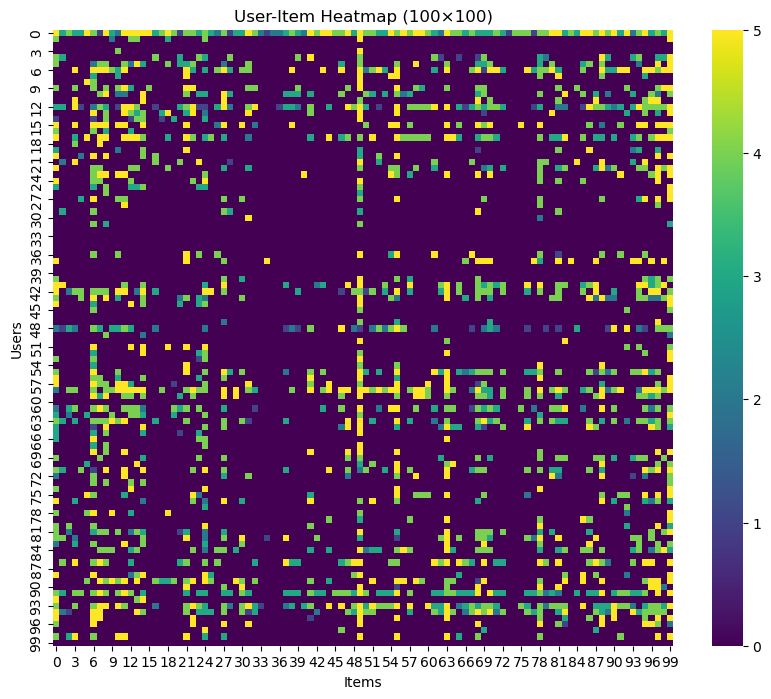

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# convert to CSR for fast slicing
interaction_csr = interaction.tocsr()

# select first 100 users and first 100 items
sub_matrix = interaction_csr[:100, :100].toarray()

plt.figure(figsize=(10, 8))
sns.heatmap(sub_matrix, cmap="viridis")
plt.title("User-Item Heatmap (100×100)")
plt.xlabel("Items")
plt.ylabel("Users")
plt.show()


In [6]:
import pickle 

with open("../models/user_map.pkl", "wb") as f:
    pickle.dump(user_map, f)

with open("../models/item_map.pkl", "wb") as f:
    pickle.dump(item_map, f)